In [1]:
import numpy as np
import pandas as pd
import re
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
%matplotlib inline

### Read CSV

In [3]:
df = pd.read_csv("job2.csv", sep='\s*;\s*', engine='python')

In [4]:
df.head()

,job_title,company,company_size,industry,required_experience,posting_date,closing_date,link,job_description
0,Data Scientist / Analyst ( UP $7K/ JURONG/ PhD...,Search Index Pte Ltd \t\t\t\t\t\t\t \t\...,1 - 50 Employees,Human Resources Management/Consulting,Min 2 years (Manager),04-July-2018,03-August-2018,https://www.jobstreet.com.sg/en/job/data-scien...,UP $7K / MNCÂ Jurong AreaÂ AWS + BONUSÂ PHD / ...
1,"VP/AVP, Data Scientist, Big Data Analytics Gro...",United Overseas Bank Limited (UOB),More than 5000 Employees,Banking/Financial Services,Min 5 years (Senior Executive),04-July-2018,03-August-2018,https://www.jobstreet.com.sg/en/job/vpavp-data...,TheÂ Data Management Office (DMO)Â is a busine...
2,(Master in Com Science/No Exp Ok!) Data Scient...,Achieve Career Consultant Pte Ltd(Recruitment ...,51 - 200 Employees,Human Resources Management/Consulting,Min 2 years (Junior Executive),03-July-2018,02-August-2018,https://www.jobstreet.com.sg/en/job/master-in-...,"S$6,000 to S$8,500 + AWS + Performance BonusGl..."
3,Data Scientist,Capita Pte Ltd(Recruitment Firm),51 - 200 Employees,Human Resources Management/Consulting,Min 5 years (Senior Executive),03-July-2018,02-August-2018,https://www.jobstreet.com.sg/en/job/data-scien...,URGENT! Data ScientistÂ Â Â Job DescriptionThe...
4,(Analysis) Data Scientist - (Listed IT MNC/$6K...,Achieve Career Consultant Pte Ltd(Recruitment ...,51 - 200 Employees,Human Resources Management/Consulting,Min 2 years (Junior Executive),03-July-2018,02-August-2018,https://www.jobstreet.com.sg/en/job/analysis-d...,"S$6,000 to S$8,500 + AWS + Performance BonusGl..."


In [5]:
for item in df["job_description"]:
    print(item +"\n") 

UP $7K / MNCÂ Jurong AreaÂ AWS + BONUSÂ PHD / Masters in Physics, Maths, Chemistry and Computer SciencesÂ Exp in Data Mining / AnalysisExp in Production Industry an added advantageÂ Â Responsibilities:Â Perform Data Analysis / MiningTransform Logic, Data into AlgorithmsÂ Transfer findings and knowledge to Production / Product DevelopmentÂ Ensure cost control in ProjectsÂ Support DOE during Production processÂ Requirement:Â PhD, Masters in Chemistry, Mathematics, Physics, Computer SciencesÂ Â To apply, please email your detailed CV in MS Word format to [emailÂ protected] with the following details inside your CV for faster processing:â€¢ Reasons for leaving each pastÂ  & current employmentâ€¢ Salary drawn for each past & current employmentâ€¢ Expected Salaryâ€¢ Earliest availability dateWe regret that only short-listed candidates will be contacted shortly.EA Licence No. | 14C7092EA Registration No. | R1110636EA Personnel | Pang Dan Pei (Danna)Â

TheÂ Data Management Office (DMO)Â is a b

As we can see in the column "company", there are some unwanted \t. and in the "job_description" column, there are some weird characters. Let's remove these unwanted whitespaces, weird characters as well as the punctuations. Extra spaces are also removed.

In [6]:
for column in df.columns:
    df[column] = df[column].str.replace("\t","")

In [8]:
df["cleaned_des"] = df["job_description"].str.replace('[^ a-zA-Z0-9]+', ' ').str.replace(' +', ' ')

In [9]:
for item in df["cleaned_des"]:
    print(item + "\n")

UP 7K MNC Jurong Area AWS BONUS PHD Masters in Physics Maths Chemistry and Computer Sciences Exp in Data Mining AnalysisExp in Production Industry an added advantage Responsibilities Perform Data Analysis MiningTransform Logic Data into Algorithms Transfer findings and knowledge to Production Product Development Ensure cost control in Projects Support DOE during Production process Requirement PhD Masters in Chemistry Mathematics Physics Computer Sciences To apply please email your detailed CV in MS Word format to email protected with the following details inside your CV for faster processing Reasons for leaving each past current employment Salary drawn for each past current employment Expected Salary Earliest availability dateWe regret that only short listed candidates will be contacted shortly EA Licence No 14C7092EA Registration No R1110636EA Personnel Pang Dan Pei Danna 

The Data Management Office DMO is a business function that covers Enterprise Data Governance Data Management Big

The cleaned job descriptions look fine now. Now, I want to analyse the required qualifications in the job descriptions to find out:
* the most demanded skills for data scientist. Concretely, the frequency of a particular skill appears in the total number of job listings.
* required years of experience, check whether the required experience matches the description in the job description.



In [10]:
skills = {"hadoop", "big data", "java", "spark", "nosql", "mongodb", 
                   "postgres", "python", "scikit-learn", "numpy", "statsmodels", 
                   "pandas", " r ", "python", "statistics", "probability", 
                   "machine learning", "c++", "neural networks", "deep learning", 
                   "big data", "artificial intelligence", "mapreduce", "mysql"}


In [11]:
skills.update(["pytorch","sklearn","seaborn","matlab","sas","aws","azure", 
                        "matplotlib","sql", "database","tensorflow","caffee",  
                        "pig", "hive", "natural language processing", "computer vision"])


In [12]:
skills

{' r ',
 'artificial intelligence',
 'aws',
 'azure',
 'big data',
 'c++',
 'caffee',
 'computer vision',
 'database',
 'deep learning',
 'hadoop',
 'hive',
 'java',
 'machine learning',
 'mapreduce',
 'matlab',
 'matplotlib',
 'mongodb',
 'mysql',
 'natural language processing',
 'neural networks',
 'nosql',
 'numpy',
 'pandas',
 'pig',
 'postgres',
 'probability',
 'python',
 'pytorch',
 'sas',
 'scikit-learn',
 'seaborn',
 'sklearn',
 'spark',
 'sql',
 'statistics',
 'statsmodels',
 'tensorflow'}

In [13]:
df["keywords"] = [[] for _ in range(len(df))]

If a kw appears in the description, add the kw into the keywords column.

In [14]:
for idx, text in df["cleaned_des"].iteritems():
    for item in skills:
        if item in text.lower():
            df["keywords"][idx].append(item)


In [15]:
df[["required_experience", "keywords"]].head()

,required_experience,keywords
0,Min 2 years (Manager),[aws]
1,Min 5 years (Senior Executive),"[machine learning, hive, r , python, big data..."
2,Min 2 years (Junior Executive),"[machine learning, r , python, deep learning,..."
3,Min 5 years (Senior Executive),"[hive, r , python, hadoop]"
4,Min 2 years (Junior Executive),"[machine learning, r , python, deep learning,..."


In [21]:
kw_list = []
for item in df["keywords"]:
    kw_list = kw_list + item


In [22]:
word_count = Counter(kw_list)

In [23]:
plot_data = word_count.most_common(200)

In [24]:
kw = []
frequency = []
for idx, item in enumerate(plot_data):
     kw.append(item[0])
     frequency.append(item[1])


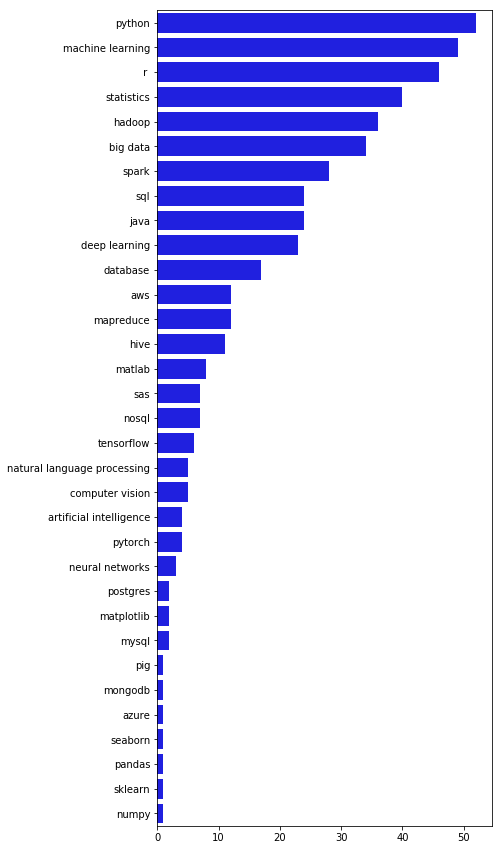

In [25]:
f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x=frequency, y=kw, color="b")

In [26]:
exp = Counter(df["required_experience"])
exp

Counter({'Entry Level': 5,
         'Junior Executive': 4,
         'Min 1 year (Non-Executive)': 1,
         'Min 2 years (Junior Executive)': 6,
         'Min 2 years (Manager)': 3,
         'Min 2 years (Non-Executive)': 1,
         'Min 2 years (Senior Executive)': 4,
         'Min 3 years (Junior Executive)': 1,
         'Min 3 years (Senior Executive)': 6,
         'Min 4 years (Manager)': 1,
         'Min 4 years (Senior Executive)': 4,
         'Min 5 years (Junior Executive)': 1,
         'Min 5 years (Manager)': 5,
         'Min 5 years (Senior Executive)': 11,
         'Min 5 years (Senior Manager)': 1,
         'Min 6 years (Senior Executive)': 1,
         'Min 8 years (Senior Manager)': 1,
         'Senior Manager': 2})

For fresh graduate without experience, I think I am only suitable for entry level and junior roles which require less than 2 years of experience.

In [27]:
no_junior_roles = exp["Entry Level"] + exp['Junior Executive'] + exp['Min 2 years (Junior Executive)'] + exp['Min 1 year (Non-Executive)'] + exp['Min 2 years (Non-Executive)']

In [29]:
percentage = no_junior_roles/58*100
print("There is {} suitable roles, and that number is {:.2f} percent of the total number of listings".format(no_junior_roles, percentage))

There is 17 suitable roles, and that number is 29.31 percent of the total number of listings
